# The ARMI Material Library

While *nuclides* are the microscopic building blocks of nature, their collection into *materials* is what we interact with at the engineering scale. The ARMI Framework provides a `Material` class, which has a composition (how many of each nuclide are in the material), and a variety of thermomechanical properties (many of which are temperature dependent), such as:

* Mass density 
* Heat capacity
* Linear or volumetric thermal expansion
* Thermal conductivity
* Solidus/liquidus temperature

and so on. 

Many of these properties are widely available in the literature for fresh materials. As materials are irradiated, the properties tend to change in complex ways. Material objects can be extended to account for such changes. 

The ARMI Framework comes with a small set of example material definitions. These are generally quite incomplete (often missing temperature dependence), and are of academic quality at best. To do engineering design calculations, users of ARMI are expected to make or otherwise prepare materials. As the ecosystem grows, we hope the material library will mature.

In any case, here we will explore the use of `Material`s. Let's get an instance of the Uranium Oxide material.

In [1]:
from armi.materials import uraniumOxide
uo2 = uraniumOxide.UO2()
density500 = uo2.density(Tc=500)
print(f"The density of UO2 @ T = 500C is {density500:.2f} g/cc")

The density of UO2 @ T = 500C is 10.82 g/cc


Taking a look at the composition

In [2]:
print(uo2.p.massFrac)

{'U235': 0.006270676074455959, 'U238': 0.8752281279011161, 'O': 0.11850119602442788}


The mass fractions of a material, plus its mass density, fully define the composition. Conversions between number density/fraction and mass density/fraction are handled on the next level up (on `Component`s), which we will explore soon.

ARMI automatically thermally-expands materials based on their coefficients of linear expansion. For instance, a piece of Uranium Oxide that's 10 cm at room temperature would be longer at 500 C according to the formula:

\begin{equation}
\frac{\Delta L}{L_0} = \alpha \Delta T
\end{equation}

On the reactor model, this all happens behind the scenes. But here at the material library level, we can see it in detail. 

In [3]:
L0 = 10.0
dLL = uo2.linearExpansionFactor(500,25)
L = L0 * (1+dLL)
print(f"Hot length is {L:.4f} cm")


Hot length is 10.0471 cm


Let's plot the heat capacity as a function of temperature in K.

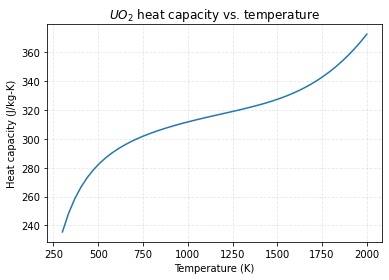

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Tk = np.linspace(300,2000)
heatCapacity = [uo2.heatCapacity(Tk=ti) for ti in Tk]
plt.plot(Tk, heatCapacity)
plt.title("$UO_2$ heat capacity vs. temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Heat capacity (J/kg-K)")
plt.grid(ls='--',alpha=0.3)

Different physics plugins require different properties to be defined. For pure neutronics runs, mass density and composition is enough. But for thermal/hydraulics runs, heat capacity and thermal conductivity is needed for solids, and more is needed for coolants. As irradiation models are investigated, creep, corrosion, porosity, swelling, and other factors will be necessary. 